# Exploratory Data Analysis
## Data
### Bill Inffo

Bill Detail | Label | Description
:-- | :-- | :--
Billing Date | `bill_date` | YYYY-MM-DD
Billing Period Start | `bill_start` | YYYY-MM-DD | Start date of the billing period
Billing Period End | `bill_end` | YYYY-MM-DD | End date of the billing period
Billing Period (days) | `bill_period_days` | *int*, number of days in billing period, `bill_end` - `bill_start`

### Base Amounts

Base Figure | Label | Description
:-- | :-- | :--
Meter Read | `meter` | The meter reading
Energy Consumption | `consumption` | kWh Used
*Peak Consumption | `peak` | *float*, kWh used in excess of 600 during designated peak months;
Peak Consumption - All Months | `peak_all`| kWh used in excess of 600 for all months

### Rates

Rate Detail | Label | Description
:-- | :-- | :--
Base rate | `consumption_rate` | *float*, per kWh charge for consumption
Peak Consumption Rate | `peak_rate` | *float*, per kWh charge for peak consumption
*Fuel Adjustment Rate | `fuel_rate` | *float*, The cost for fuel above the base rate
Regualtory Adjustment Rate | `regulatory_rate` | *float*, This covers two costs — the cost of statewide transmission and the cost CPS Energy pays to be a part of the Electric Reliability Council of Texas (ERCOT)

### Charges

Charge Detail | Label | Description
:-- | :-- | :--
*Service Availablity Charge | `service_charge` | *float*, Covers the cost of metering and billing for your address, regardless of consumption
Energy Charge | `consumption_charge` | *float*, Recovers costs for power plants and other infrastructure based on the amount of electricity you use, `consumption` * `consumption_rate` 
Peak Consumption Charge | `peak_charge` | *float*, The Peak Capacity Charge covers the higher costs for electricity CPS Energy incurs during summer months when demand for electricity is at its highest
Fuel Adjustment Charge | `fuel_charge` | *float*, `fuel_rate` * `consumption`, The fuel adjustment covers the difference between the base rate customers are charged for natural gas use and how much it actually costs to get and deliver that gas. This charge fluctuates with the market price of natural gas.
Regulatory Adjustment Charge | `regulatory_charge` | *float*, `regulatory_rate` * `consumption` 
Total Bill Amount | `total_bill` | *float*, (1) `service_charge` + (2) `consumption_charge` + (3) `peak_charge` + (4) `fuel_charge` + (5) `regulatory_charge`

### Feature Engineering
Variable Detail | Label | Description
:-- | :-- | :--



## Inital Hypotheses
- More energy is used during peak energy months of (06) June - (09) September
    - Can measure this by consumption per day (`consumption` / `billing_period`

## Questions
1. How variable is `billing period`? How much do the number of days in bill vary?
2. How does each rate change over time? And which rates appear to be constant?
3. Which rate has the most/least variance?
4. Is the `service_charge` the same each month?
5. Which months had the highest and lowest average charges per day for each charge type?
6. Are the peak consumption amounts per day actually higher during the peak (06) June - (09) Septemeber months? 
7. What does the relationship between consumption and meter read amount look like?
    - Comparison of both month by month
    - Correlation?
8. What is the correlation between total bill and total bill per day?

In [1]:
import pandas as pd

In [4]:
file = 'data.csv'

df = pd.read_csv(file, index_col=0)
df

,bill_date,bills_start,bills_end,bill_period,meter,consumption,peak,consumption_rate,peak_rate,fuel_rate,regulatory_rate,service_charge,consumption_charge,peak_charge,fuel_charge,regulatory_charge,total_bill
0,09/28/21,2021-08-25,2021-09-24,31,66863,974,374,0.06910,0.0198,0.01718,0.01236,8.75,67.30340,7.4052,16.73332,12.03864,112.23056
1,10/27/21,2021-09-25,2021-10-25,31,67645,782,0,0.06910,0.0000,0.02568,0.01236,8.75,54.03620,0.0000,20.08176,9.66552,92.53348
2,11/29/21,2021-10-26,2021-11-23,29,68433,788,0,0.06910,0.0000,0.02899,0.01236,8.75,54.45080,0.0000,22.84412,9.73968,95.78460
3,12/28/21,2021-11-24,2021-12-23,30,69389,956,0,0.06910,0.0000,0.02382,0.01236,8.75,66.05960,0.0000,22.77192,11.81616,109.39768
4,01/28/22,2021-12-24,2022-01-26,34,71014,1625,0,0.06910,0.0000,0.01882,0.01236,8.75,112.28750,0.0000,30.58250,20.08500,171.70500
5,02/25/22,2022-01-27,2022-02-23,28,72565,1551,0,0.06910,0.0000,0.02631,0.01278,8.75,107.17410,0.0000,40.80681,19.82178,176.55269
6,03/25/22,2022-02-24,2022-03-23,28,73703,1138,0,0.07188,0.0000,0.02889,0.01278,9.10,81.79944,0.0000,32.87682,14.54364,138.31990
7,04/27/22,2022-03-24,2022-04-25,33,74397,694,0,0.07188,0.0000,0.02745,0.01278,9.10,49.88472,0.0000,19.05030,8.86932,86.90434
8,05/26/22,2022-04-26,2022-05-24,29,75229,832,0,0.07188,0.0000,0.03062,0.01278,9.10,59.80416,0.0000,25.47584,10.63296,105.01296
9,06/27/22,2022-05-25,2022-06-23,30,76481,1252,652,0.07188,0.0206,0.04093,0.01278,9.10,89.99376,13.4312,51.24436,16.00056,179.76988


In [6]:
df.shape

(13, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bill_date           13 non-null     object 
 1   bills_start         13 non-null     object 
 2   bills_end           13 non-null     object 
 3   bill_period         13 non-null     int64  
 4   meter               13 non-null     int64  
 5   consumption         13 non-null     int64  
 6   peak                13 non-null     int64  
 7   consumption_rate    13 non-null     float64
 8   peak_rate           13 non-null     float64
 9   fuel_rate           13 non-null     float64
 10  regulatory_rate     13 non-null     float64
 11  service_charge      13 non-null     float64
 12  consumption_charge  13 non-null     float64
 13  peak_charge         13 non-null     float64
 14  fuel_charge         13 non-null     float64
 15  regulatory_charge   13 non-null     float64
 16  total_bill

In [11]:
df['billing_per_day'] = df.total_bill/df.bill_period
df['consumption_per_day'] = df.consumption_charge/df.bill_period

df.sample()

,bill_date,bills_start,bills_end,bill_period,meter,consumption,peak,consumption_rate,peak_rate,fuel_rate,regulatory_rate,service_charge,consumption_charge,peak_charge,fuel_charge,regulatory_charge,total_bill,billing_per_day,consumption_per_day
10,07/27/22,2022-06-24,2022-07-25,32,77789,1308,708,0.07188,0.0206,0.03902,0.01278,9.1,94.01904,14.5848,51.03816,16.71624,185.45824,5.79557,2.938095


In [13]:
df.describe().iloc[1:]

,bill_period,meter,consumption,peak,consumption_rate,peak_rate,fuel_rate,regulatory_rate,service_charge,consumption_charge,peak_charge,fuel_charge,regulatory_charge,total_bill,billing_per_day,consumption_per_day
mean,30.384615,73263.384615,1082.615385,208.307692,0.070597,0.007862,0.029431,0.012618,8.938462,76.390757,4.268123,31.926978,13.670248,135.194567,4.466113,2.521860
std,1.850156,4376.594139,292.524226,286.987626,0.001442,0.010352,0.007517,0.000213,0.181606,20.364737,5.898116,12.080446,3.723323,36.767618,1.240304,0.678166
min,28.000000,66863.000000,694.000000,0.000000,0.069100,0.000000,0.017180,0.012360,8.750000,49.884720,0.000000,16.733320,8.869320,86.904340,2.633465,1.511658
25%,29.000000,69389.000000,832.000000,0.000000,0.069100,0.000000,0.025680,0.012360,8.750000,59.804160,0.000000,22.771920,10.632960,105.012960,3.620341,2.062212
50%,30.000000,73703.000000,1010.000000,0.000000,0.071880,0.000000,0.028890,0.012780,9.100000,72.598800,0.000000,30.582500,12.907800,138.319900,4.514774,2.341897
75%,31.000000,76481.000000,1252.000000,410.000000,0.071880,0.020600,0.036540,0.012780,9.100000,89.993760,8.446000,40.806810,16.000560,171.705000,5.651794,2.938095
max,34.000000,79963.000000,1625.000000,708.000000,0.071880,0.020600,0.040930,0.012780,9.100000,112.287500,14.584800,51.244360,20.085000,185.458240,6.305453,3.827646


In [14]:
df.isna().sum()

bill_date              0
bills_start            0
bills_end              0
bill_period            0
meter                  0
consumption            0
peak                   0
consumption_rate       0
peak_rate              0
fuel_rate              0
regulatory_rate        0
service_charge         0
consumption_charge     0
peak_charge            0
fuel_charge            0
regulatory_charge      0
total_bill             0
billing_per_day        0
consumption_per_day    0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df.bill_date.dtype

dtype('O')

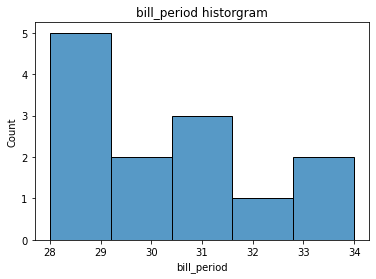

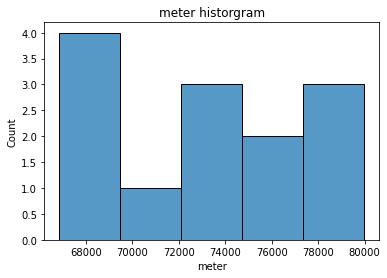

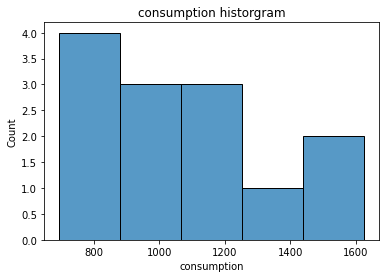

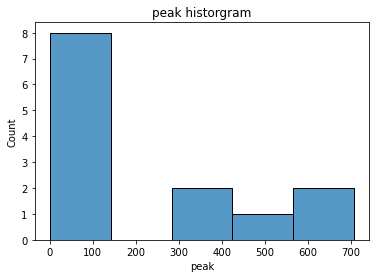

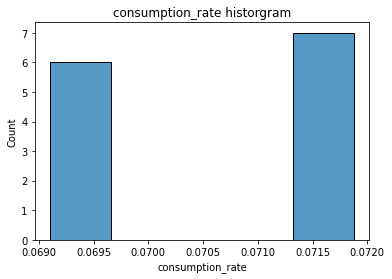

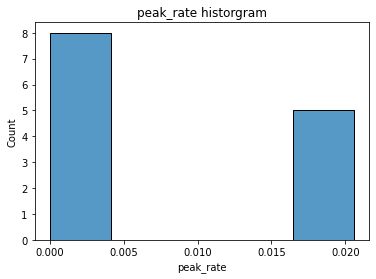

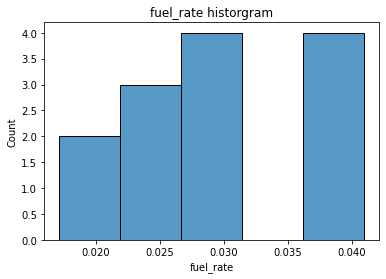

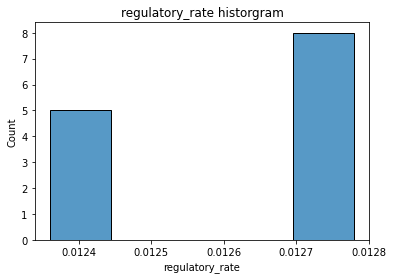

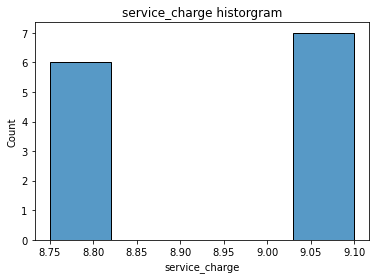

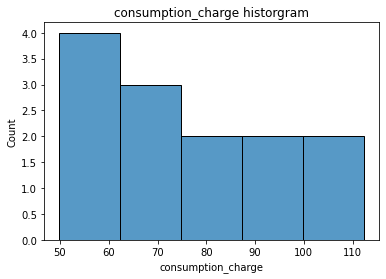

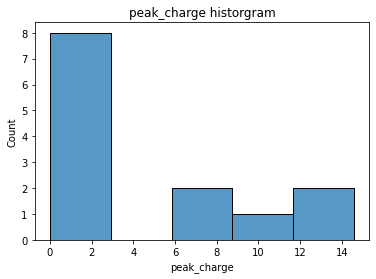

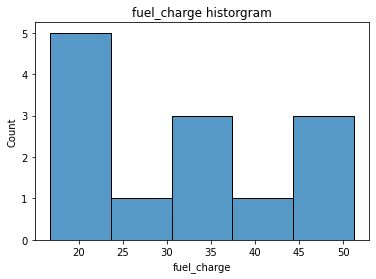

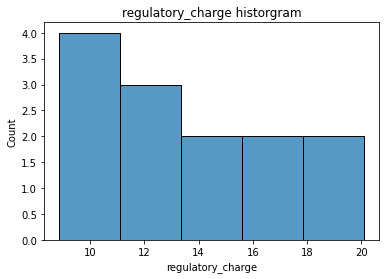

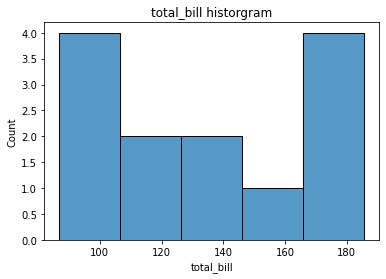

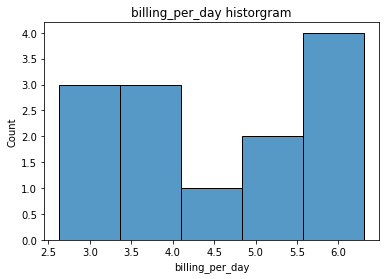

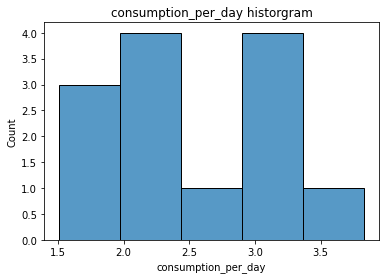

In [23]:
for field in df:
    if df[field].dtype != 'O':
        sns.histplot(df[field])
        plt.title(f'{field} historgram')
        plt.show()

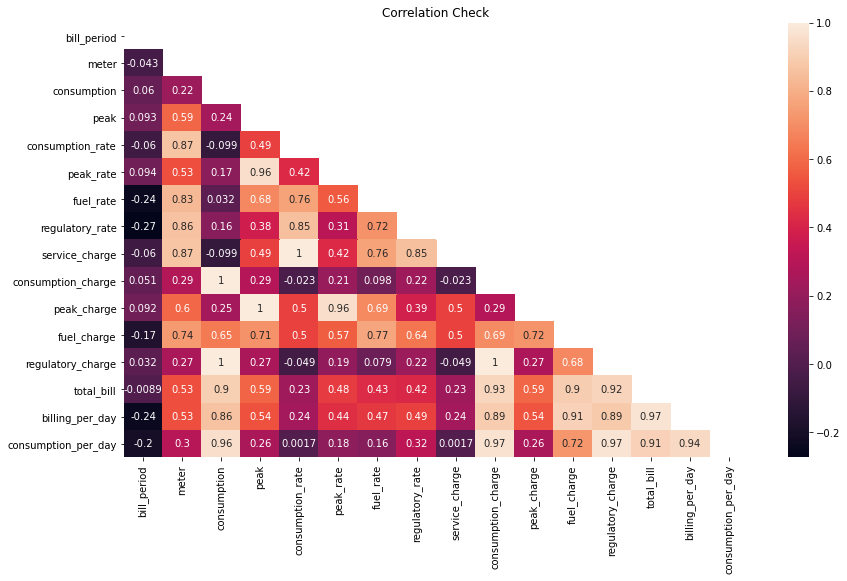

In [35]:
import numpy as np

plt.figure(figsize = (14, 8))

mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), annot = True, mask = mask)

plt.title('Correlation Check')
plt.show()

## Q1: How variable is billing period? How much do the number of days in bill vary?

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


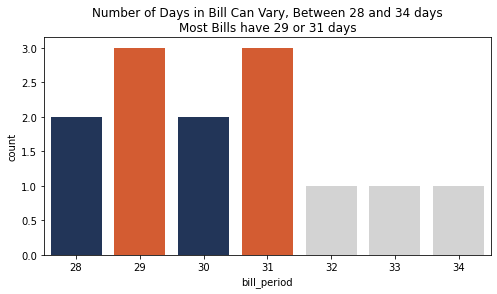

In [72]:
plt.figure(figsize = (8, 4))

sns.countplot(df.bill_period, palette = ['#193261', '#EE4F17', '#193261', '#EE4F17'
                                         , '#D3D3D3', '#D3D3D3', '#D3D3D3'])
plt.title('Number of Days in Bill Can Vary, Between 28 and 34 days\nMost Bills have 29 or 31 days')
plt.show()

## Q2: How does each rate change over time? And which rates appear to be constant?

In [73]:
df.sample()

,bill_date,bills_start,bills_end,bill_period,meter,consumption,peak,consumption_rate,peak_rate,fuel_rate,regulatory_rate,service_charge,consumption_charge,peak_charge,fuel_charge,regulatory_charge,total_bill,billing_per_day,consumption_per_day
12,09/27/22,2022-08-24,2022-09-23,31,79963,1010,410,0.07188,0.0206,0.03654,0.01278,9.1,72.5988,8.446,36.9054,12.9078,139.958,4.514774,2.341897


In [83]:
rates = ['bill_date', 'consumption_rate', 'peak_rate', 'fuel_rate', 'regulatory_rate']

df[rates].set_index('bill_date')

,consumption_rate,peak_rate,fuel_rate,regulatory_rate
bill_date,,,,
09/28/21,0.06910,0.0198,0.01718,0.01236
10/27/21,0.06910,0.0000,0.02568,0.01236
11/29/21,0.06910,0.0000,0.02899,0.01236
12/28/21,0.06910,0.0000,0.02382,0.01236
01/28/22,0.06910,0.0000,0.01882,0.01236
02/25/22,0.06910,0.0000,0.02631,0.01278
03/25/22,0.07188,0.0000,0.02889,0.01278
04/27/22,0.07188,0.0000,0.02745,0.01278
05/26/22,0.07188,0.0000,0.03062,0.01278


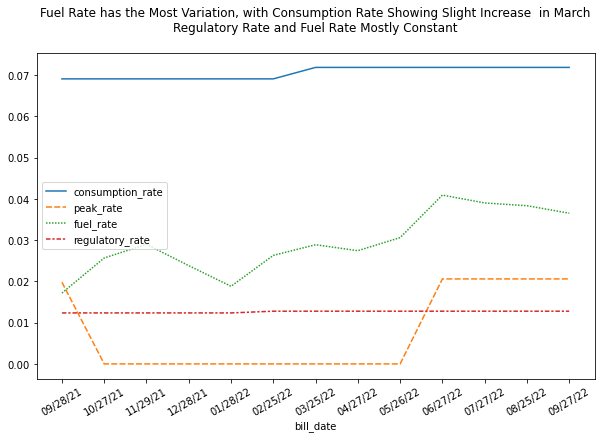

In [92]:
plt.figure(figsize = (10, 6))

# df[rates].plot()
sns.lineplot(data = df[rates].set_index('bill_date'))
plt.title('Fuel Rate has the Most Variation, with Consumption Rate Showing Slight Increase  in March\nRegulatory Rate and Fuel Rate Mostly Constant\n')
plt.xticks(rotation=30)
plt.show()

Max: 0.07188
Min: 0.0691
Diff between Max and Min: 0.0027800000000000047

consumption_rate
0.07188    7
0.06910    6
Name: consumption_rate, dtype: int64


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


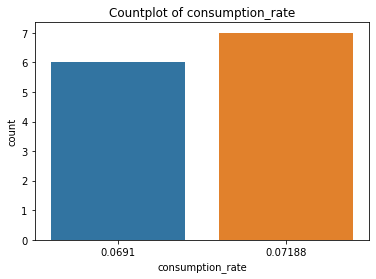


Max: 0.0206
Min: 0.0
Diff between Max and Min: 0.0206

peak_rate
0.0000    8
0.0206    4
0.0198    1
Name: peak_rate, dtype: int64


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


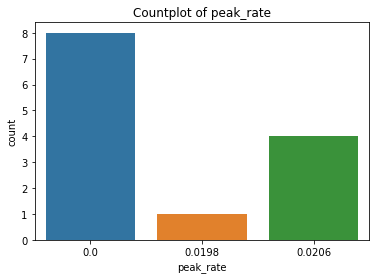


Max: 0.04093
Min: 0.01718
Diff between Max and Min: 0.02375

fuel_rate
0.02889    1
0.04093    1
0.01882    1
0.02899    1
0.03902    1
0.01718    1
0.02382    1
0.02745    1
0.03062    1
0.02568    1
0.02631    1
0.03835    1
0.03654    1
Name: fuel_rate, dtype: int64


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


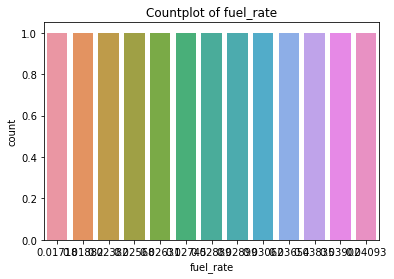


Max: 0.01278
Min: 0.01236
Diff between Max and Min: 0.00042000000000000023

regulatory_rate
0.01278    8
0.01236    5
Name: regulatory_rate, dtype: int64


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


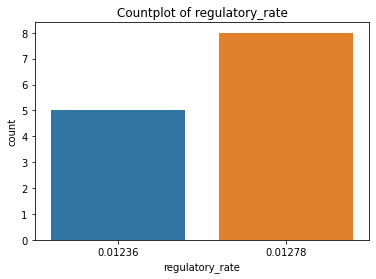

In [99]:
for rate in df[rates].iloc[:, 1:]:
    print(f'Max: {df[rates].iloc[:, 1:][rate].max()}')
    print(f'Min: {df[rates].iloc[:, 1:][rate].min()}')
    print(f'Diff between Max and Min: {df[rates].iloc[:, 1:][rate].max() - df[rates].iloc[:, 1:][rate].min()}')
    print()
    print(f'{rate}')
    print(df[rates].iloc[:, 1:][rate].value_counts())
    sns.countplot(df[rates].iloc[:, 1:][rate])
    plt.title(f'Countplot of {rate}')
    plt.show()
    print()

## Q3: Is the service charge the same each month?

In [101]:
df.service_charge.value_counts()

9.10    7
8.75    6
Name: service_charge, dtype: int64

<AxesSubplot:ylabel='bill_date'>

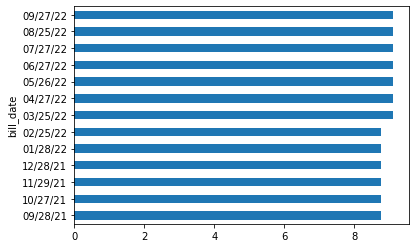

In [109]:
df.set_index('bill_date').service_charge.plot.barh()

## Q5: Which months had the highest and lowest average charges per day for each charge type?

In [110]:
df.sample()

,bill_date,bills_start,bills_end,bill_period,meter,consumption,peak,consumption_rate,peak_rate,fuel_rate,regulatory_rate,service_charge,consumption_charge,peak_charge,fuel_charge,regulatory_charge,total_bill,billing_per_day,consumption_per_day
8,05/26/22,2022-04-26,2022-05-24,29,75229,832,0,0.07188,0.0,0.03062,0.01278,9.1,59.80416,0.0,25.47584,10.63296,105.01296,3.621137,2.062212


In [111]:
df.query('billing_per_day == billing_per_day.max()')

,bill_date,bills_start,bills_end,bill_period,meter,consumption,peak,consumption_rate,peak_rate,fuel_rate,regulatory_rate,service_charge,consumption_charge,peak_charge,fuel_charge,regulatory_charge,total_bill,billing_per_day,consumption_per_day
5,02/25/22,2022-01-27,2022-02-23,28,72565,1551,0,0.0691,0.0,0.02631,0.01278,8.75,107.1741,0.0,40.80681,19.82178,176.55269,6.305453,3.827646


In [112]:
df.query('billing_per_day == billing_per_day.min()')

,bill_date,bills_start,bills_end,bill_period,meter,consumption,peak,consumption_rate,peak_rate,fuel_rate,regulatory_rate,service_charge,consumption_charge,peak_charge,fuel_charge,regulatory_charge,total_bill,billing_per_day,consumption_per_day
7,04/27/22,2022-03-24,2022-04-25,33,74397,694,0,0.07188,0.0,0.02745,0.01278,9.1,49.88472,0.0,19.0503,8.86932,86.90434,2.633465,1.511658
